In [116]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[0:10]


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [57]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        # print(ch1,ch2)
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) +1
        # print(ch1,ch2)

In [117]:
import torch    
import numpy as np

In [70]:

sorted(set(''.join(words)))

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [74]:
ar = zip(range(28),['<S>'] + sorted(set(''.join(words)))+ ['<E>'])
for a in ar:
    print(a)

(0, '<S>')
(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')
(5, 'e')
(6, 'f')
(7, 'g')
(8, 'h')
(9, 'i')
(10, 'j')
(11, 'k')
(12, 'l')
(13, 'm')
(14, 'n')
(15, 'o')
(16, 'p')
(17, 'q')
(18, 'r')
(19, 's')
(20, 't')
(21, 'u')
(22, 'v')
(23, 'w')
(24, 'x')
(25, 'y')
(26, 'z')
(27, '<E>')


In [118]:
N = torch.zeros((27,27), dtype=torch.int32)

chars = sorted( list(set( ''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0

itos = {i:s for s,i in stoi.items()}
itos
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [119]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        # print(ch1,ch2)
        # bigram = (ch1,ch2)
        # b[bigram] = b.get(bigram,0) +1
        # print(ch1,ch2)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2]+=1

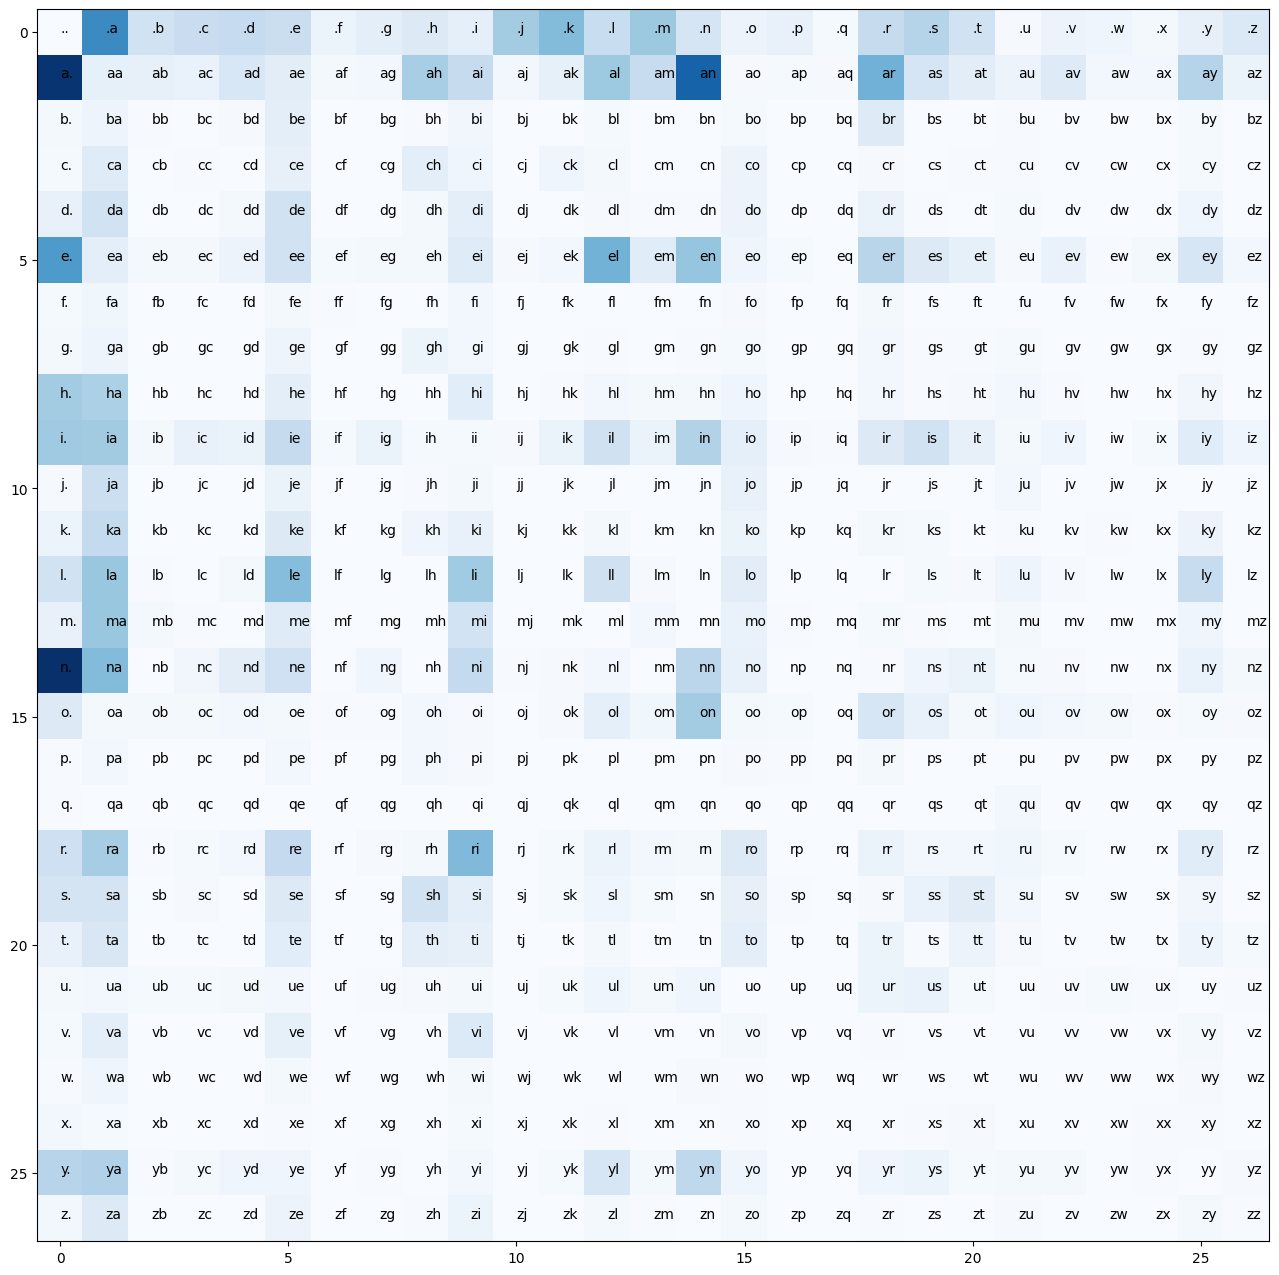

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range (27):
        chstr=''.join([itos[j], itos[i]])
        plt.text(i,j, chstr)

In [98]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [92]:
p = N[0].float()
p = p/p.sum()
p


tensor([[0.0000e+00, 6.8835e-02, 2.0385e-02, 2.4069e-02, 2.6379e-02, 2.3897e-02,
         6.5089e-03, 1.0442e-02, 1.3642e-02, 9.2249e-03, 3.7805e-02, 4.6249e-02,
         2.4537e-02, 3.9615e-02, 1.7888e-02, 6.1499e-03, 8.0386e-03, 1.4360e-03,
         2.5583e-02, 3.2076e-02, 2.0416e-02, 1.2175e-03, 5.8689e-03, 4.7919e-03,
         2.0916e-03, 8.3508e-03, 1.4501e-02],
        [0.0000e+00, 3.2310e-03, 2.9657e-03, 4.8388e-04, 5.7129e-03, 8.5849e-04,
         3.2779e-04, 2.6535e-04, 1.4204e-03, 2.4038e-03, 4.2144e-04, 1.1707e-03,
         9.8648e-03, 5.9938e-03, 9.7243e-03, 1.5609e-04, 2.6535e-04, 1.4048e-04,
         7.5235e-03, 3.0281e-03, 1.1238e-03, 2.3726e-03, 3.7930e-03, 9.3653e-05,
         4.2144e-04, 2.7003e-03, 2.3726e-03],
        [0.0000e+00, 2.6379e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.9491e-03,
         0.0000e+00, 0.0000e+00, 1.4048e-04, 6.3997e-04, 1.5609e-05, 0.0000e+00,
         1.3268e-03, 0.0000e+00, 0.0000e+00, 1.2019e-03, 0.0000e+00, 0.0000e+00,
         1.0083e-

In [121]:
P = N.float()
P = P/P.sum(1,keepdim=True)



In [123]:
g = torch.Generator().manual_seed(2147483647)

for i in range (10):
    ix = 0
    out = []
    while True:
        p=P[ix]
        # p = N[ix].float()
        # p = p/p.sum()
        
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        # print(p, ix)
        # print(itos[ix])
        out.append(itos[ix])
        if ix ==0:
            break
    print(''.join(out))
        


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [125]:
log_likelihood = 0.0
n=0

for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        # print([ch1],[ch2],[ch3])
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        # print(f'{ch1}{ch2}{ch3}: {prob:.4f} {logprob:.4f}')

nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

nll=tensor(559891.7500)
2.454094171524048
